<a href="https://colab.research.google.com/github/reemalsubaiee/Random/blob/main/CALIPER_BS_GR_PE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import lib.

In [1]:
# import lasio lab.

!pip install lasio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 2.6 MB/s eta 0:00:00


In [5]:
#import nessecary libraries

import pandas as pd
import matplotlib.pyplot as plt

import lasio
import numpy as np



## Shows logs and delete unwanted logs

In [58]:
las = lasio.read("bugsy_1_gr_res_den_main_r1.las")

In [7]:
#shows what are the section in the las file
las.sections.keys()


dict_keys(['Version', 'Well', 'Curves', 'Parameter', 'Other'])

In [60]:
#delete unwanted logs from the file

las.delete_curve('CS')
las.delete_curve('GTEM')
las.delete_curve('ICV')
las.delete_curve('IHV')
las.delete_curve('TENS')
las.delete_curve('AZIM')
las.delete_curve('TNPH')
las.delete_curve('HDRA')
las.delete_curve('PEFZ')
las.delete_curve('RLA1')
las.delete_curve('RLA2')
las.delete_curve('RLA3')
las.delete_curve('RLA4')
las.delete_curve('RLA5')
las.delete_curve('LCAL')
las.delete_curve('PEFL')
las.delete_curve('DTCO')
las.delete_curve('ULDS')
las.delete_curve('CDF')
las.delete_curve('DTSM')
las.delete_curve('PR')
las.delete_curve('VPVS')
las.delete_curve('CRD1_PPC1')
las.delete_curve('CRD2_PPC1')
las.delete_curve('CRD3_PPC1')
las.delete_curve('CRD4_PPC1')
las.delete_curve('ETC1_PPC1')
las.delete_curve('ETC2_PPC1')
las.delete_curve('HD1_PPC1')
las.delete_curve('HD2_PPC1')
las.delete_curve('HDOV_PPC1')
las.delete_curve('INCL')

In [61]:
#show the logs in the file with units and description
for curve in las.curves:
  print (f"Curve: {curve.mnemonic},   \t\t Units: {curve.unit},  \t\t\t Description: {curve.descr}")

Curve: DEPT,   		 Units: M,  			 Description: DEPTH (BOREHOLE) {F10.4}
Curve: BS,   		 Units: IN,  			 Description: Bit Size {F13.4}
Curve: GR_EDTC,   		 Units: GAPI,  			 Description: Gamma Ray {F13.4}
Curve: ECGR_EDTC,   		 Units: GAPI,  			 Description: Environmentally Corrected Gamma Ray {F13.4}
Curve: ECGR,   		 Units: GAPI,  			 Description: Environmentally Corrected Gamma Ray {F13.4}
Curve: GR,   		 Units: GAPI,  			 Description: Gamma Ray {F13.4}
Curve: NPHI,   		 Units: V/V,  			 Description: Thermal Neutron Porosity (original Ratio Method) in Selected Lithology {F13.4}
Curve: NPOR,   		 Units: V/V,  			 Description: Enhanced Thermal Neutron Porosity in Selected Lithology {F13.4}
Curve: HCAL,   		 Units: IN,  			 Description: HRCC Caliper Calibrated {F13.4}
Curve: RHOZ,   		 Units: G/C3,  			 Description: Standard Resolution Formation Density {F13.4}
Curve: RXOZ,   		 Units: OHMM,  			 Description: Invaded Formation Resistivity filtered at 18 inches {F13.4}
Curve: UZ,   		 Uni

# Convert las to pandas and plot data

In [62]:
#convert las file to pandas inorder to plot and do other stuff
Well=las.df()

In [63]:
Well.reset_index(inplace=True)  # to include the depth in the coloums of the table

#shows table of the first 5 rows of data with headers
Well.head()


,DEPT,BS,GR_EDTC,ECGR_EDTC,ECGR,GR,NPHI,NPOR,HCAL,RHOZ,RXOZ,UZ,DI_HRLT,RM_HRLT,RT_HRLT,RXO_HRLT,DRH,RHOM,SP
0,-10.5156,12.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-10.3632,12.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-10.2108,12.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-10.0584,12.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-9.9060,12.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#shows how many non-null values and data type

Well.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16889 entries, 0 to 16888
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      16889 non-null  int64  
 1   DEPT       16889 non-null  float64
 2   BS         16889 non-null  float64
 3   GR_EDTC    16820 non-null  float64
 4   ECGR_EDTC  16820 non-null  float64
 5   ECGR       12819 non-null  float64
 6   GR         12819 non-null  float64
 7   NPHI       12819 non-null  float64
 8   NPOR       12819 non-null  float64
 9   HCAL       12818 non-null  float64
 10  PEFZ       12587 non-null  float64
 11  RHOZ       12587 non-null  float64
 12  RXOZ       12818 non-null  float64
 13  DI_HRLT    12818 non-null  float64
 14  RM_HRLT    12818 non-null  float64
 15  RT_HRLT    12818 non-null  float64
 16  RXO_HRLT   12818 non-null  float64
 17  DRH        12639 non-null  float64
 18  RHOM       12639 non-null  float64
 19  SP         12819 non-null  float64
dtypes: flo

In [ ]:
#Shows statical info about data

Well.describe()


,DEPT,BS,GR_EDTC,ECGR_EDTC,ECGR,GR,NPHI,NPOR,HCAL,PEFZ,RHOZ,RXOZ,DI_HRLT,RM_HRLT,RT_HRLT,RXO_HRLT,DRH,RHOM,SP
count,16889.000000,16889.000000,16820.000000,16820.000000,12819.000000,12819.000000,12819.000000,12819.000000,12818.000000,12587.000000,12587.000000,12818.000000,12818.000000,12818.000000,12818.000000,12818.000000,12639.000000,12639.000000,12819.000000
mean,1276.350054,9.463867,87.871769,88.892230,110.106673,107.661367,0.275848,0.317901,8.375049,2.675351,1.953406,4.267195,20.752033,0.022900,850.637610,820.896573,-0.417643,1.917338,-132.167043
std,743.038098,1.638786,59.343973,60.305964,64.219445,63.265429,0.122249,0.147233,0.854705,44.879634,44.835818,7.089173,9.173784,0.004047,9026.207607,8970.716592,44.516924,44.591642,46.702618
min,-10.515600,8.500000,11.966400,10.035100,19.162700,18.814800,0.017800,0.039800,2.913800,-5030.093600,-5027.766700,0.030000,8.528100,0.006200,0.000100,0.000100,-5004.748200,-5010.757400,-186.250000
25%,632.917200,8.500000,43.371225,42.968150,69.346450,67.361650,0.182700,0.207400,8.335400,2.254850,2.251650,0.494800,12.204450,0.020100,1.389750,1.025525,-0.017400,2.241150,-177.656300
50%,1276.350000,8.500000,72.787500,74.439400,90.558100,87.955300,0.272500,0.308200,8.445200,3.061200,2.343800,1.206400,21.666800,0.022100,11.544500,1.592250,-0.009600,2.334600,-145.625000
75%,1919.782800,12.250000,104.919300,106.441400,144.189400,141.271000,0.372350,0.415400,8.579500,3.409400,2.497950,4.781500,25.325675,0.026400,29.612475,6.372225,-0.001800,2.473700,-94.150050
max,2563.215600,12.250000,599.772900,608.216400,735.798000,721.093200,0.747400,1.573200,21.771900,10.000000,4.474600,64.932200,87.407800,0.039200,100000.000000,100000.000000,0.104700,3.046000,-1.426600


<Axes: >

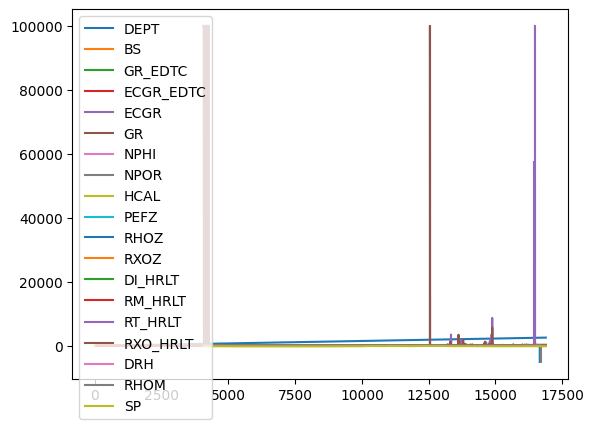

In [ ]:
#plot data in y and x format

Well.plot()

<Axes: >

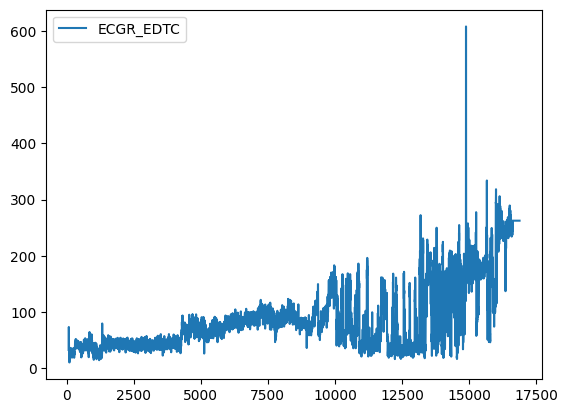

In [ ]:
#plot one specific log

Well.plot(y='ECGR_EDTC')

<Axes: xlabel='HCAL'>

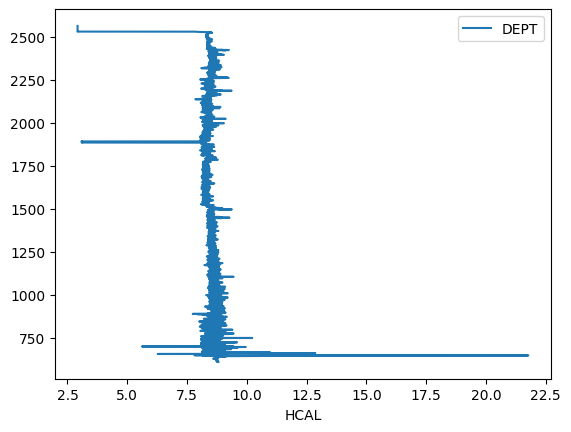

In [ ]:
#quick plot

Well.plot('HCAL', 'DEPT')

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >], dtype=object)

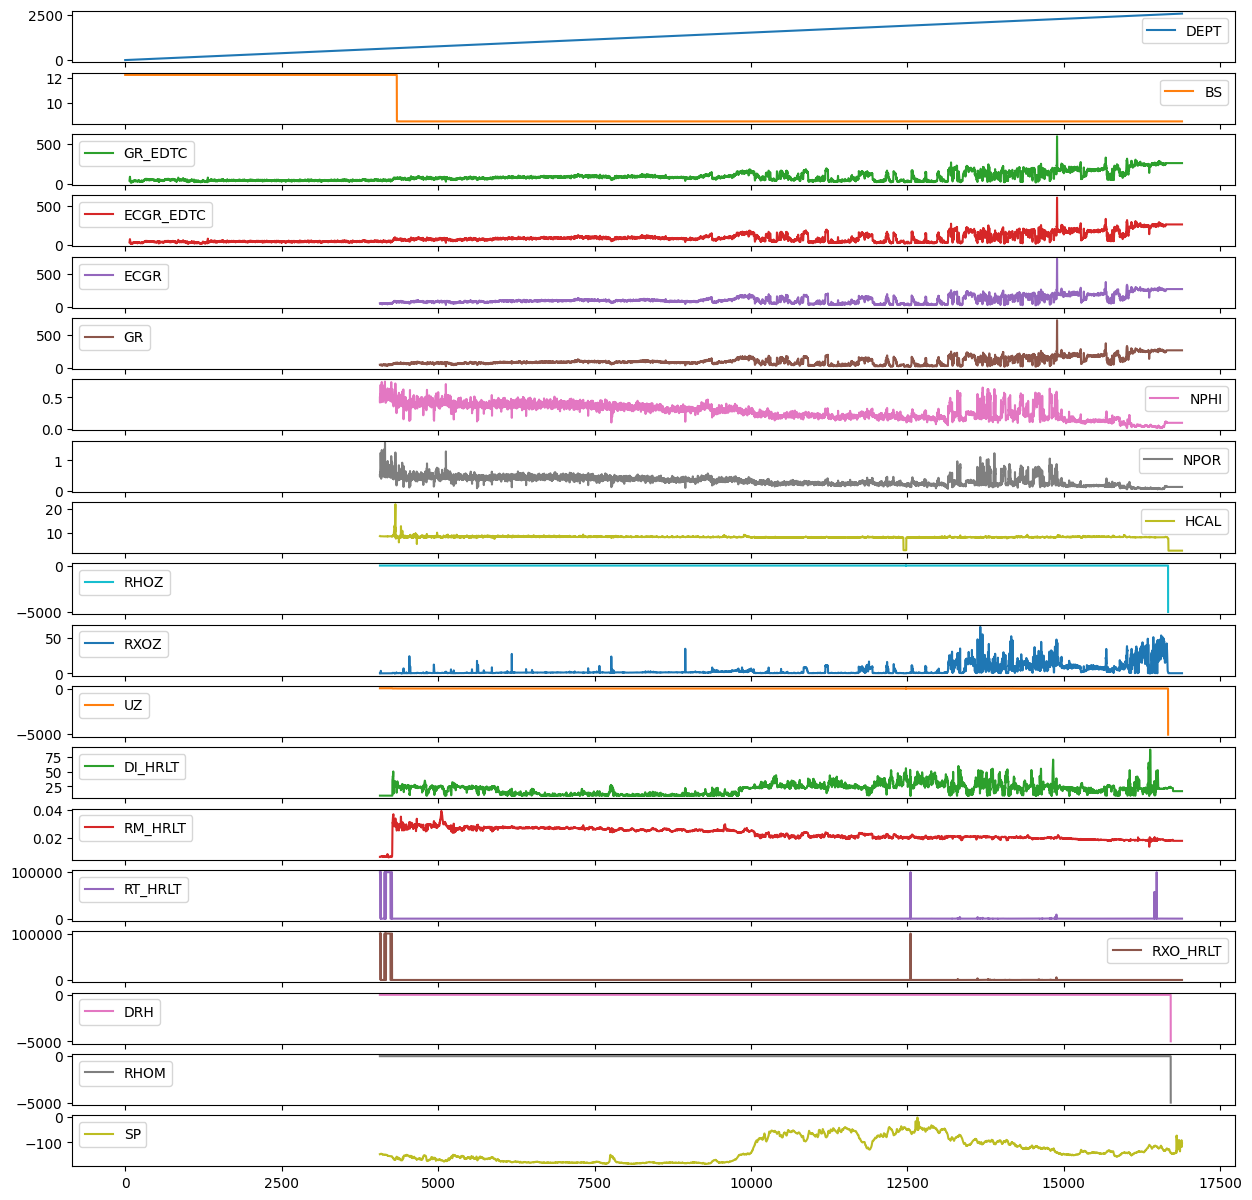

In [65]:
# quick plot of all plots but horizantally

Well.plot(subplots=True , figsize=(15,15))

<ipython-input-15-340f4b33a64c>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  x1= plt.subplot2grid((1,2),(0,0), rowspan=1 , colspan=1)


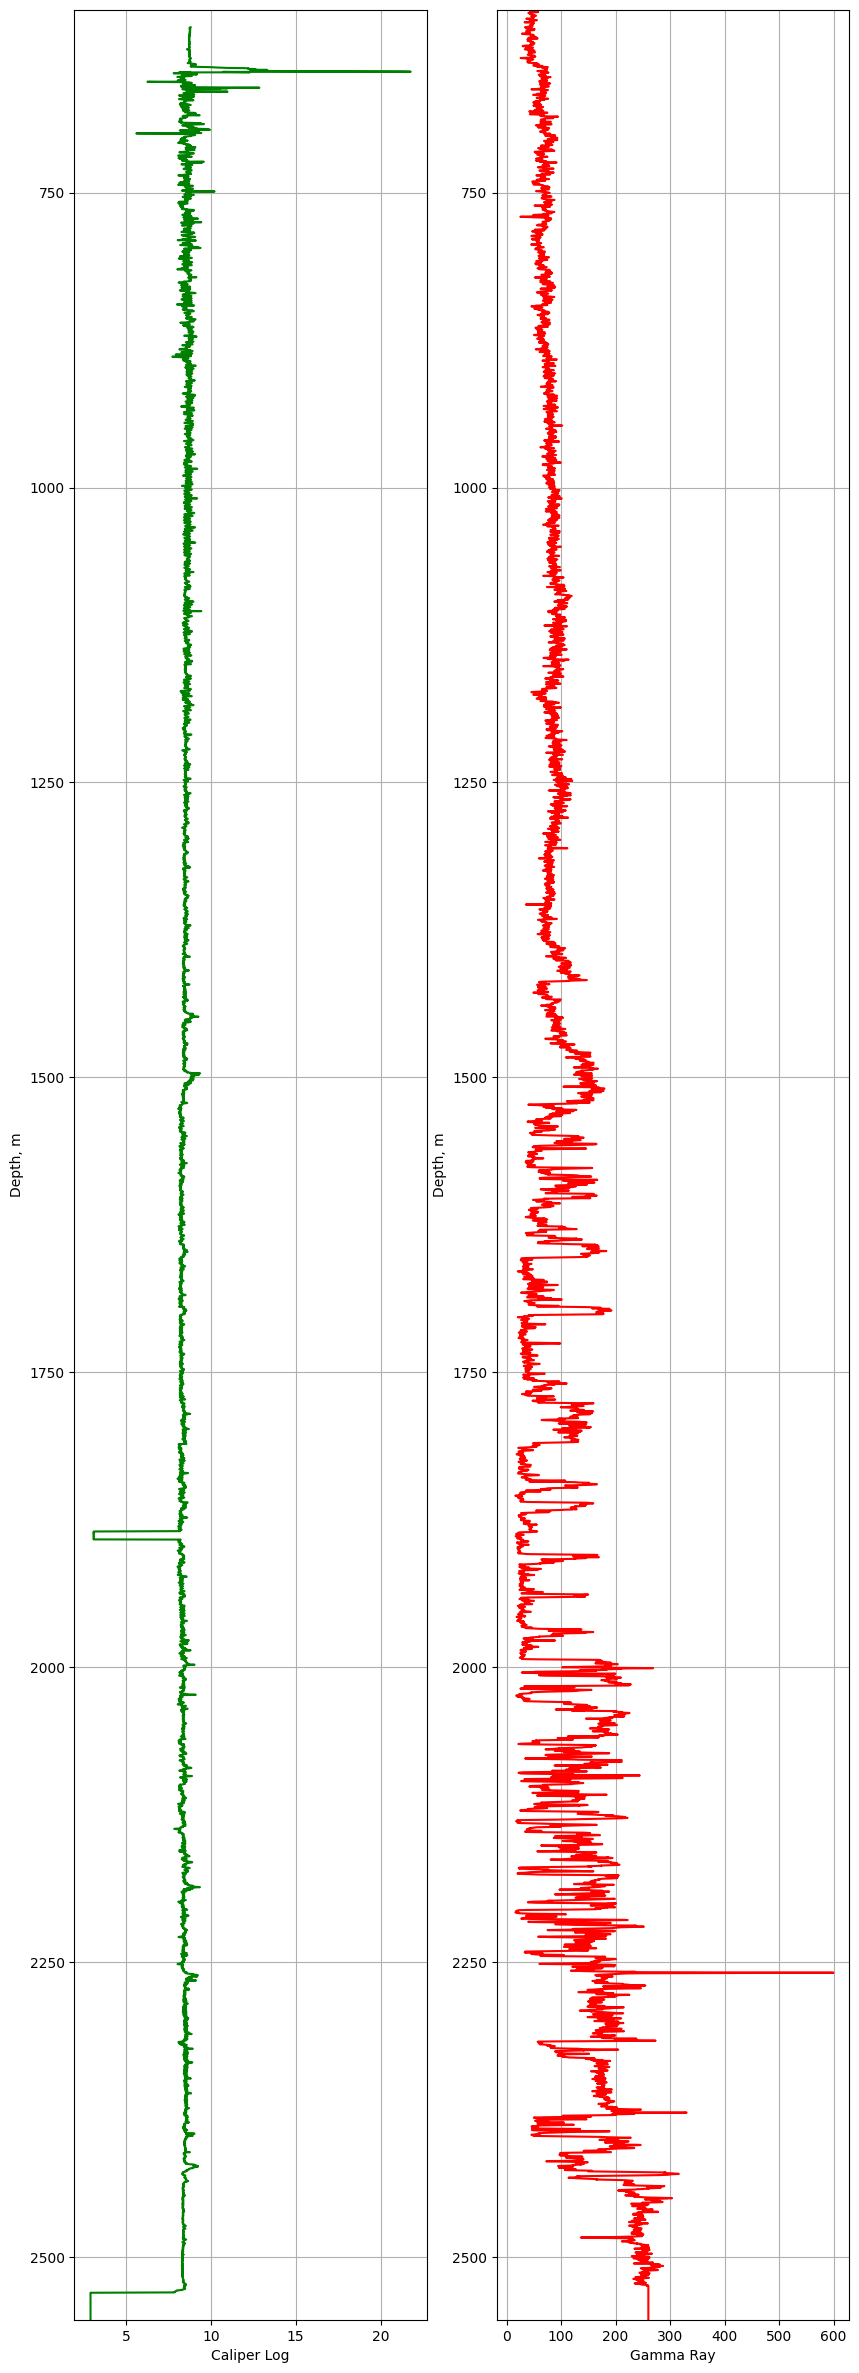

In [15]:
# plotting logs one by one vertically

# figsize=(10,30) , 10 width and 30 height

figure = plt.subplots(figsize=(10,30))

# (1,1) one coloum one row
# (0,0) first plot to the left in the grid

#rowspan =1 and colspan= 1 > take the size of one plot

x1= plt.subplot2grid((1,2),(0,0), rowspan=1 , colspan=1)
x2= plt.subplot2grid((1,2),(0,1), rowspan=1 , colspan=1)

x1.plot("HCAL", "DEPT", data = Well, color="green")
x1.set_xlabel("Caliper Log")
x1.set_ylabel("Depth, m")
x1.set_ylim(2553,595)
x1.grid()



x2.plot("GR_EDTC", "DEPT", data = Well, color="red")
x2.set_xlabel("Gamma Ray")
x2.set_ylabel("Depth, m")
x2.set_ylim(2553,595)
x2.grid()

<ipython-input-16-ea5c908db409>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  x1= plt.subplot2grid((1,4),(0,0), rowspan=1 , colspan=1)


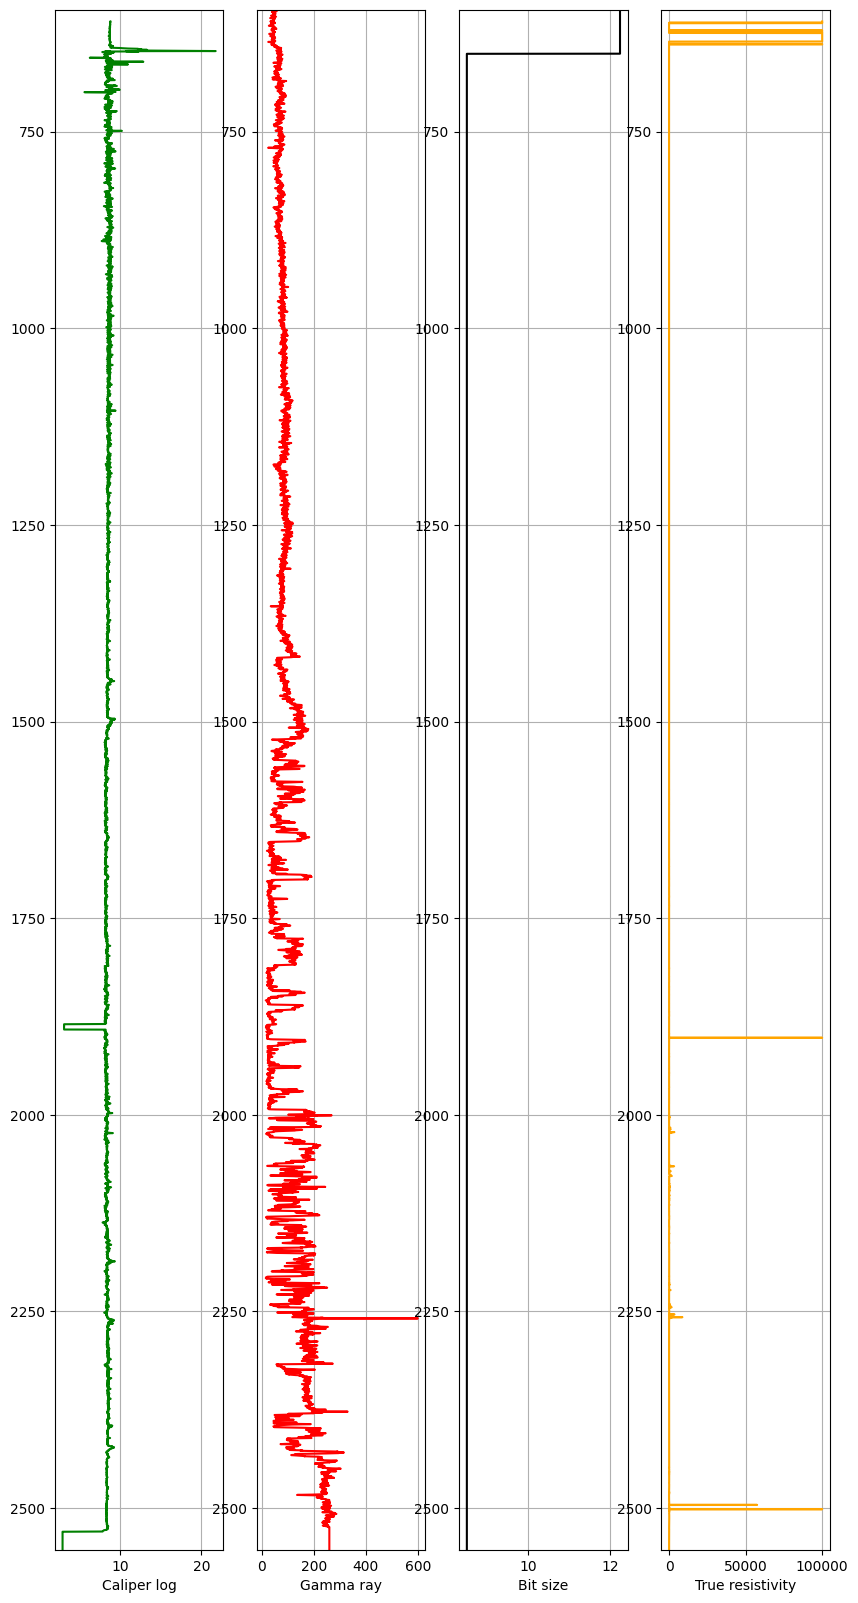

In [16]:
# another way of plotting the logs without repeateion

fig, axes = plt.subplots(figsize=(10,20))

curve_names=['Caliper log', 'Gamma ray', 'Bit size', 'True resistivity']

#plots location second (0,3) because python starts from 0!

x1= plt.subplot2grid((1,4),(0,0), rowspan=1 , colspan=1)
x2= plt.subplot2grid((1,4),(0,1), rowspan=1 , colspan=1)
x3= plt.subplot2grid((1,4),(0,2), rowspan=1 , colspan=1)
x4= plt.subplot2grid((1,4),(0,3), rowspan=1 , colspan=1)

x1.plot("HCAL", "DEPT", data = Well, color="green")
x2.plot("GR_EDTC", "DEPT", data = Well, color="red")
x3.plot("BS", "DEPT", data = Well, color="black")
x4.plot("RT_HRLT", "DEPT", data = Well, color="orange")

# automatically name axis

for i, x in enumerate(fig.axes):
  x.set_ylim(2553,595)
  x.set_xlabel(curve_names[i]) #dont forget i for iteration
  x.grid()

<ipython-input-17-5d6ee97e9b79>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  x1= plt.subplot2grid((1,6),(0,0), rowspan=1 , colspan=1)


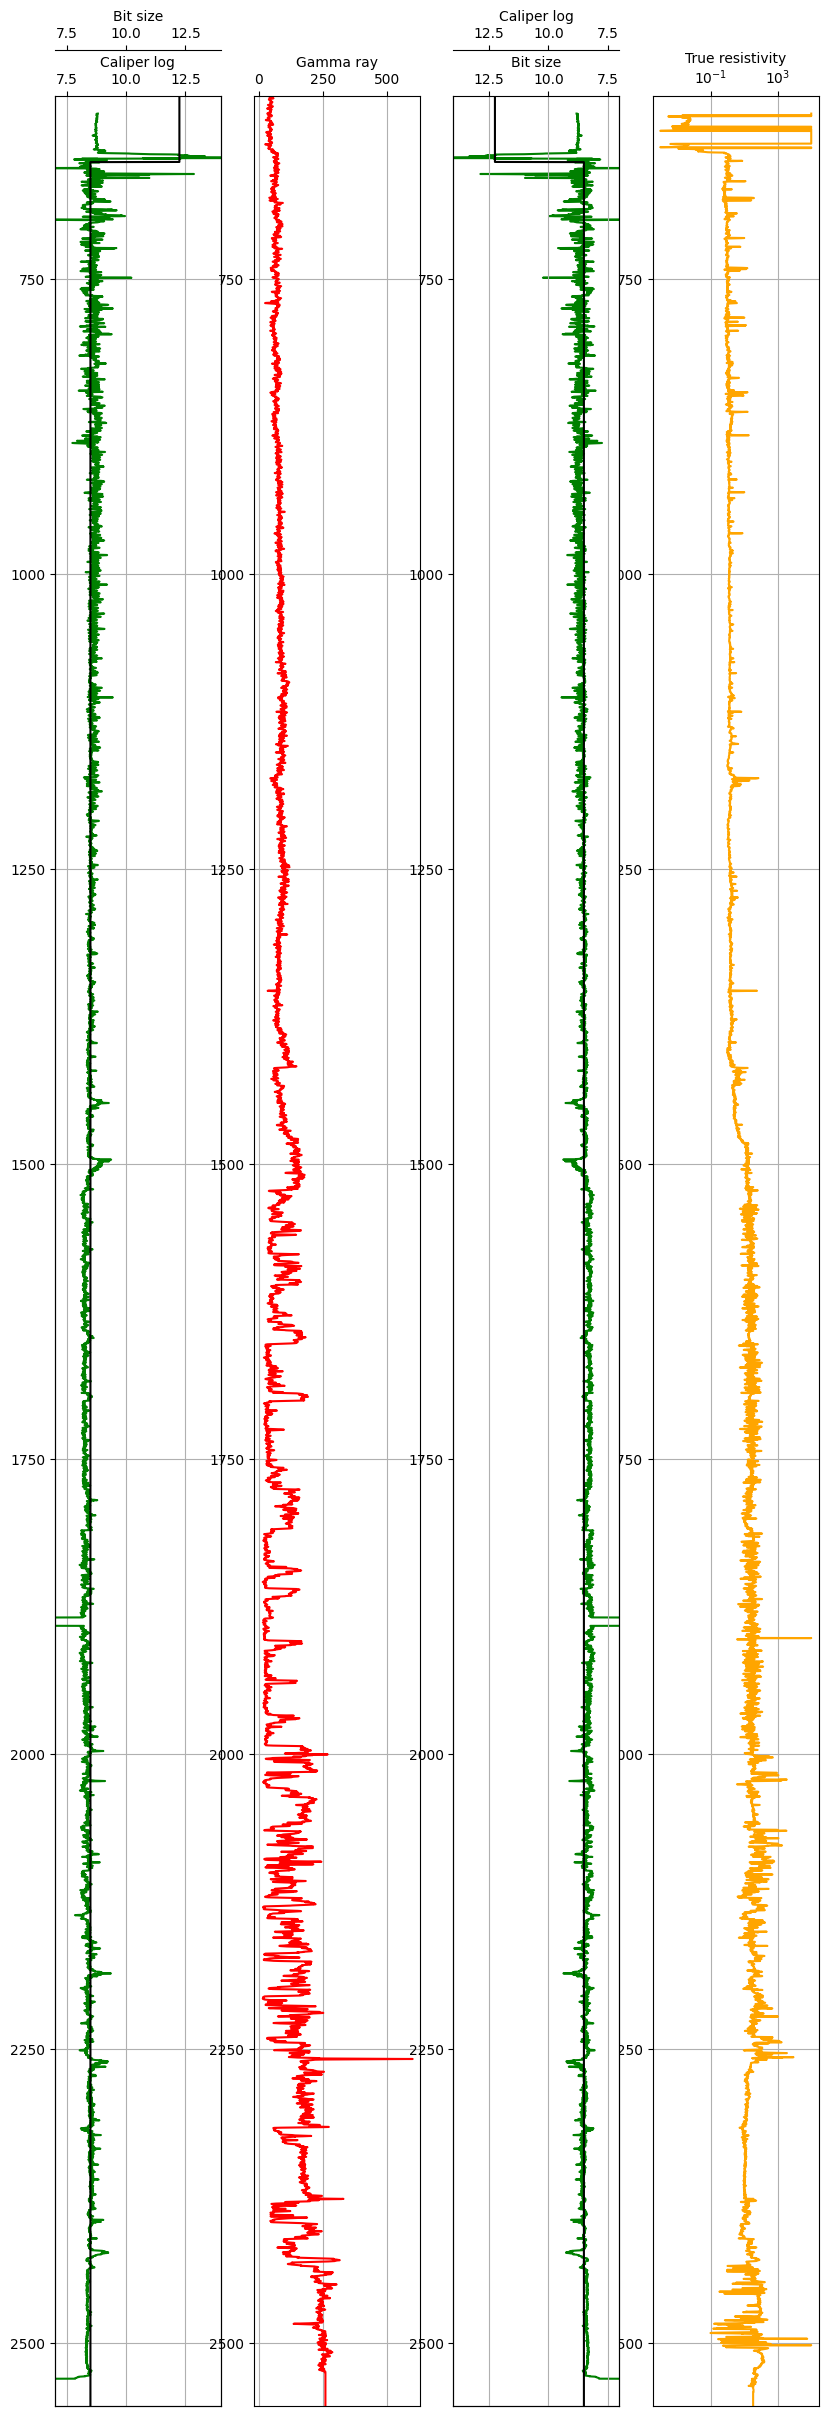

In [17]:
# another way of plotting the logs without repeateion

fig, axes = plt.subplots(figsize=(15,30))

curve_names=['Caliper log', 'Gamma ray', 'Bit size', 'True resistivity', 'Caliper log', 'Bit size']

#plots location second (0,3) because python starts from 0!

x1= plt.subplot2grid((1,6),(0,0), rowspan=1 , colspan=1)
x2= plt.subplot2grid((1,6),(0,1), rowspan=1 , colspan=1)
x3= x1.twiny()
x4= plt.subplot2grid((1,6),(0,3), rowspan=1 , colspan=1)
x5= plt.subplot2grid((1,6),(0,2), rowspan=1 , colspan=1)
x6= x5.twiny()

x1.plot("HCAL", "DEPT", data = Well, color="green")
x1.set_xlim(7,14)
x2.plot("GR_EDTC", "DEPT", data = Well, color="red")
x3.plot("BS", "DEPT", data = Well, color="black")
x3.set_xlim(7,14)
x4.plot("RT_HRLT", "DEPT", data = Well, color="orange")
x4.semilogx()
x5.plot("HCAL", "DEPT", data = Well, color="green")
x5.set_xlim(14,7)
x6.plot("BS", "DEPT", data = Well, color="black")
x6.set_xlim(14,7)
# automatically name axis

for i, x in enumerate(fig.axes):
  x.set_ylim(2553,595)
  x.set_xlabel(curve_names[i]) #dont forget i for iteration
  x.xaxis.set_ticks_position("top")
  x.xaxis.set_label_position("top")
  x.grid()
  if i == 2 :
    x.spines["top"].set_position(("axes", 1.02))
  else:
   x.grid()

  if i == 4:
    x.spines["top"].set_position(("axes", 1.02))
  else:
    x.grid()


<ipython-input-95-61724d701c7a>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  x1= plt.subplot2grid((1,6),(0,0), rowspan=1 , colspan=1)


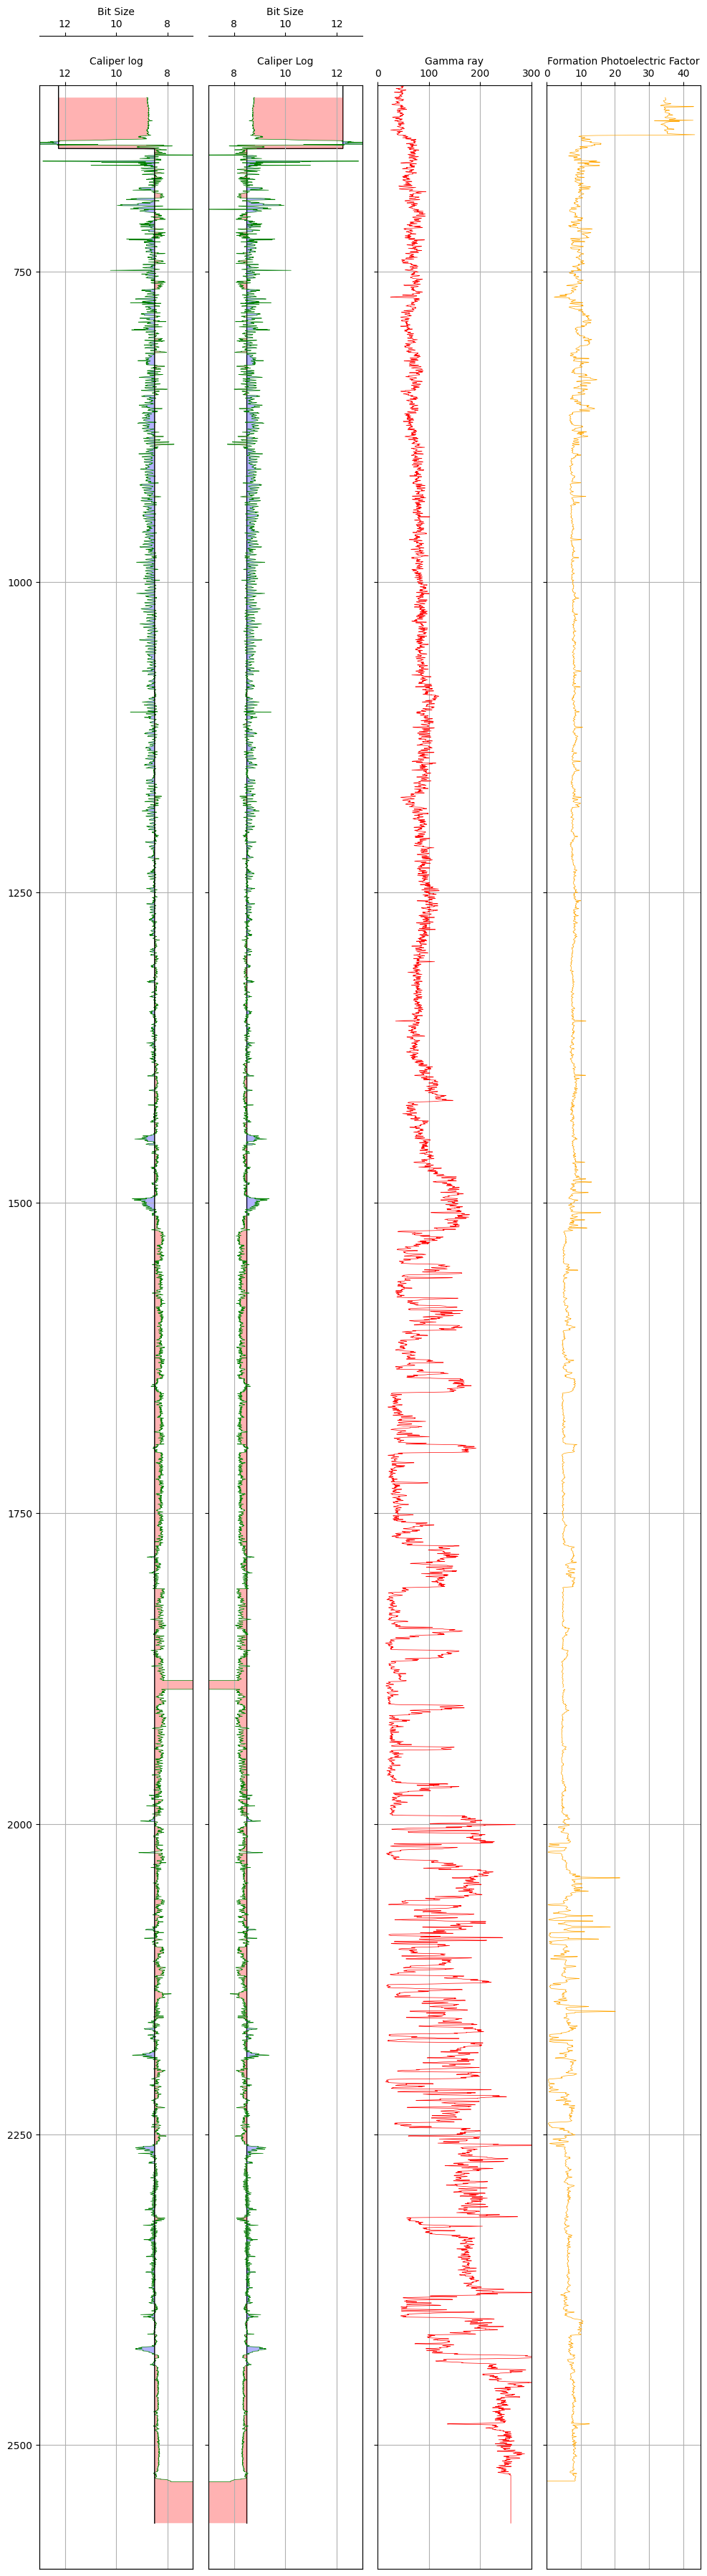

In [95]:
#another way of plotting the logs without repeateion

fig, axes = plt.subplots(figsize=(18,45))

curve_names=['Caliper log','Bit Size','Caliper Log' ,'Bit Size','Gamma ray','Formation Photoelectric Factor']

#plots location second (0,3) because python starts from 0!

x1= plt.subplot2grid((1,6),(0,0), rowspan=1 , colspan=1)
x2= plt.subplot2grid((1,6),(0,1), rowspan=1 , colspan=1)
x3= x2.twiny()
x4= x1.twiny()

# bit and caliper logs in both sidesm lw is line width

x1.plot("HCAL", "DEPT", data = Well, color="green", lw=0.5)
x1.set_xlim(13,7)
x2.plot("BS", "DEPT", data = Well, color="black", lw=1)
x2.set_xlim(7,13)
x3.plot("HCAL", "DEPT", data = Well, color="green", lw=0.5)
x3.set_xlim(7,13)
x4.plot("BS", "DEPT", data = Well, color="black", lw=1)
x4.set_xlim(13,7)


# filling between the plots, alpha is the trancperncy, write first y axis, start from, the end value
x1.fill_betweenx(Well['DEPT'], Well['HCAL'], Well['BS'],where=Well['HCAL']< Well['BS'], facecolor='Red', alpha=0.3)
x1.fill_betweenx(Well['DEPT'], Well['BS'], Well['HCAL'], where=Well['HCAL']>= Well['BS'],facecolor='Blue', alpha=0.3)
x3.fill_betweenx(Well['DEPT'], Well['HCAL'], Well['BS'],where=Well['HCAL']< Well['BS'], facecolor='Red', alpha=0.3)
x3.fill_betweenx(Well['DEPT'], Well['BS'], Well['HCAL'], where=Well['HCAL']>= Well['BS'],facecolor='Blue', alpha=0.3)




# adding Gamma ray log to the plot
x5= plt.subplot2grid((1,6),(0,2), rowspan=1 , colspan=1)
x5.plot("GR_EDTC", "DEPT", data = Well, color="red", lw=0.5)
x5.set_xlim(0,300)

# adding photoelectric log to the plot
x6= plt.subplot2grid((1,6),(0,3), rowspan=1 , colspan=1)
x6.plot("UZ", "DEPT", data = Well, color="Orange", lw=0.5)
x6.set_xlim(0,45)



# automatically name axis, (2600,600) the first is the end depth and 600 is ther starter depth

for i, x in enumerate(fig.axes):
  x.set_ylim(2600,600)
  x.set_xlabel(curve_names[i]) #dont forget i for iteration
  x.xaxis.set_ticks_position("top")
  x.xaxis.set_label_position("top")
  x.grid()
  if i == 1 :
    x.spines["top"].set_position(("axes", 1.02))
  else:
   x.grid()

  if i == 3:
    x.spines["top"].set_position(("axes", 1.02))
  else:
    x.grid()


#Hide the yaxis from other logs except the first log

for x in [x2, x3, x4, x5 ,x6]:
  plt.setp(x.get_yticklabels(), visible=False)

#Reduce the sapcing between logs

fig.subplots_adjust(wspace=0.1)